# Notebook to add more scintillation scamples for training/testing

* `comms_rfi.ipynb` similar to this notebook, but for RFI not Scint.
* `label_ro_nb.ipynb` (notebook for assigning labels to dataset) + `view_ro_for_labels.ipynb` (notebook for viewin samples from `/scripts/make_label_plots.py` to assign labels)

## Correspondence with Chang:
For 'good days' and 'profiles identified as scintillation events', I'll add the list in the following link. 
[Scintillation events (actual, real)](https://o365coloradoedu-my.sharepoint.com/:x:/g/personal/hych7684_colorado_edu/EWLYYKCw2VFDso-tmCg3tkcBj7Ktg6SO1Kdyt2xvPS1a2g?e=4yFPaU&CID=423d6006-915e-a089-8feb-afae721225d1&clickParams=eyJYLUFwcE5hbWUiOiJNaWNyb3NvZnQgT3V0bG9vayBXZWIgQXBwIiwiWC1BcHBWZXJzaW9uIjoiMjAyNDA2MjgwMDQuMDciLCJPUyI6Ik1hYyBPUyBYIHVuZGVmaW5lZCJ9)


**tldr: day of year 2023.080-2023.082**

## Workflow

* make_label_plots for specific threshold:
    * l2 or l1 sigma_phi >0.05 **OR**
    * s4 > 0.2

* version two:
    * wanted to accomodate low SNR across entire profile triggers
        * l1/l2 S4 max between thresholds
        * sigmaphi max greater than sigmaphi threshold but median sigmaphi less than .05

* version two part II
    * add severe scintillation label

In [2]:
import xarray as xr
import numpy as np
import geopandas as gpd
import pandas as pd
import os
def load_leo(fn):
    ds = xr.open_dataset(fn, decode_times=False)
    return ds


import sys
 
# adding Folder_2 to the system path
sys.path.insert(0, '/home/stdi2687/gnss-leo-data/scripts')
from feature_extract_util import *

In [2]:
init_samples=pd.read_csv('../data/scint_event_chang.txt', header=None, skiprows=1, delim_whitespace=True, names=["number","file"])

In [130]:
#max_rfi=[]
scint_labels_li=[]

s4_threshmin=1
s4_threshmax=1.2
sigphi_thresh=.1

s4l1_li=[]
s4l2_li=[]
phil1_li=[]
phil2_li=[]
count=0
for index, row in init_samples.iloc[:].iterrows():

        
    #sample='%s.%03d.%s.%02d.01.%s.SC001_0001' %(start_t.year,start_t.day_of_year,spireid, start_t.hour,gnssid)
    #sample='2023.144.103.01.01.E33.SC001_0001'
    sample = row.file[7:-8]
    fn1='/media/datastore/mirror/spwxdp/repro4/spire/level1b/scnPhs/%s/scnPhs_%s.0001_nc'%(sample[:8],sample)
    fn2='/media/datastore/mirror/spwxdp/repro4/spire/level2/scnLv2/%s/scnLv2_%s.0001_nc'%(sample[:8],sample)
    
    '''
    #because I interrupted once
    feature_pkl='../data/feature_sets/%s.pkl' %sample
    import os.path
    if os.path.isfile(feature_pkl):
        scint_labels_li+=[sample]
        count+=1
        continue
    '''

    try:
        lv1=xr.open_dataset(fn1, decode_times=False)
        lv2=xr.open_mfdataset(fn2, decode_times=False)
        # keep for viewing distribution of max's
        s4l1_li+=[lv2.s4max_L1]
        s4l2_li+=[lv2.s4max_L2]
        phil1_li+=[lv2.sigmaphimax_L1]
        phil2_li+=[lv2.sigmaphimax_L2]

        # now filter samples (thresholds are ~80% of distribution)
        if ((lv2.s4_L1.max().values > s4_threshmin) and (lv2.s4_L1.max().values < s4_threshmax)) or ((lv2.s4_L2.max().values > s4_threshmin) and (lv2.s4_L2.max().values < s4_threshmax)) or (lv2.sigma_phi_L1.max().values > sigphi_thresh) or (lv2.sigma_phi_L1.max().values > sigphi_thresh) :
            if np.median(lv2.sigma_phi_L1)<.03:
                
                #print(count)
                feature_pkl='../data/feature_sets/%s.pkl' %sample
                import os.path
                if os.path.isfile(feature_pkl):
                    scint_labels_li+=[sample]
                    count+=1
                    continue
                fdf=extract_fs(lv1,lv2)
                plot_leo_feat_RFI(sample, lv1,lv2,fdf)
                fdf.to_pickle('../data/feature_sets/%s.pkl' %sample)
                count+=1
                scint_labels_li+=[sample]

    except Exception as ex:
        print(ex)
        #print(file_n)


# Save dataframe of samples created
li_ln=len(scint_labels_li)
converted_labels_scint_dict={"Filename":scint_labels_li, "Approx time (s)":np.full(li_ln, np.nan) ,	
 "Label":np.full(li_ln, "Scint 2") ,	"Unnamed: 4":np.full(li_ln, np.nan) ,	
 "Unnamed: 5":np.full(li_ln, np.nan) ,	"labeled?":np.full(li_ln, False) }

converted_labels_scint_df=pd.DataFrame(converted_labels_scint_dict)
converted_labels_scint_df.to_pickle('../data/converted_labels_scint.pkl')


/home/stdi2687/gnss-leo-data/.venv/lib/python3.7/site-packages/xarray/core/computation.py:724: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/home/stdi2687/gnss-leo-data/.venv/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1545: RuntimeWarning: invalid value encountered in subtract
  np.subtract(arr, avg, out=arr, casting='unsafe')
/home/stdi2687/gnss-leo-data/.venv/lib/python3.7/site-packages/xarray/core/computation.py:724: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/home/stdi2687/gnss-leo-data/.venv/lib/python3.7/site-packages/xarray/core/computation.py:724: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


## ADD more Data    

In [10]:
init_samples.file.to_list()

['scnPhs_2023.080.113.11.01.E36.SC001_0001.0001_nc',
 'scnPhs_2023.080.113.11.01.G07.SC001_0001.0001_nc',
 'scnPhs_2023.080.113.11.01.G10.SC001_0001.0001_nc',
 'scnPhs_2023.080.113.14.01.G14.SC001_0001.0001_nc',
 'scnPhs_2023.080.115.15.01.G29.SC001_0001.0001_nc',
 'scnPhs_2023.080.117.00.01.G12.SC001_0001.0001_nc',
 'scnPhs_2023.080.117.11.01.G08.SC001_0001.0001_nc',
 'scnPhs_2023.080.117.23.01.G12.SC001_0001.0001_nc',
 'scnPhs_2023.080.119.03.01.G29.SC001_0001.0001_nc',
 'scnPhs_2023.080.119.04.01.G23.SC001_0001.0001_nc',
 'scnPhs_2023.080.119.18.01.G01.SC001_0001.0001_nc',
 'scnPhs_2023.080.119.18.01.G03.SC001_0001.0001_nc',
 'scnPhs_2023.080.119.18.02.G12.SC001_0001.0001_nc',
 'scnPhs_2023.080.119.18.02.G25.SC001_0001.0001_nc',
 'scnPhs_2023.080.119.18.02.G29.SC001_0001.0001_nc',
 'scnPhs_2023.080.120.00.01.G07.SC001_0001.0001_nc',
 'scnPhs_2023.080.120.00.01.G15.SC001_0001.0001_nc',
 'scnPhs_2023.080.120.00.02.R07.SC001_0001.0001_nc',
 'scnPhs_2023.080.120.05.01.R03.SC001_0001.000

In [7]:
converted_labels_scint_df=pd.read_pickle('../data/converted_labels_scint.pkl')
converted_labels_scint_df.head()
tmp_li=converted_labels_scint_df.Filename.to_list()
tmp_li=['scnPhs_'+ val + '.0001_nc' for val in tmp_li]

,Filename,Approx time (s),Label,Unnamed: 4,Unnamed: 5,labeled?
0,2023.080.117.11.01.G08.SC001_0001,NaN,Scint 2,NaN,NaN,True
1,2023.080.119.03.01.G29.SC001_0001,NaN,Scint 2,NaN,NaN,True
2,2023.080.119.18.01.G01.SC001_0001,NaN,Scint 2,NaN,NaN,True
3,2023.080.119.18.02.G12.SC001_0001,NaN,Scint 2,NaN,NaN,True
4,2023.080.120.05.01.R03.SC001_0001,NaN,Scint 2,NaN,NaN,True


In [17]:
new_df = init_samples[~init_samples.file.isin(tmp_li)]

In [31]:
#max_rfi=[]
scint_labels_li=[]

s4_threshmin=.7
s4_threshmax=1.5
sigphi_thresh=.07

s4l1_li=[]
s4l2_li=[]
phil1_li=[]
phil2_li=[]
count=0
for index, row in new_df.iloc[:].iterrows():

    #sample='%s.%03d.%s.%02d.01.%s.SC001_0001' %(start_t.year,start_t.day_of_year,spireid, start_t.hour,gnssid)
    #sample='2023.144.103.01.01.E33.SC001_0001'
    sample = row.file[7:-8]
    fn1='/media/datastore/mirror/spwxdp/repro4/spire/level1b/scnPhs/%s/scnPhs_%s.0001_nc'%(sample[:8],sample)
    fn2='/media/datastore/mirror/spwxdp/repro4/spire/level2/scnLv2/%s/scnLv2_%s.0001_nc'%(sample[:8],sample)
    
    '''
    #because I interrupted once
    feature_pkl='../data/feature_sets/%s.pkl' %sample
    import os.path
    if os.path.isfile(feature_pkl):
        scint_labels_li+=[sample]
        count+=1
        continue
    '''

    try:
        lv1=xr.open_dataset(fn1, decode_times=False)
        lv2=xr.open_mfdataset(fn2, decode_times=False)
        # keep for viewing distribution of max's
        s4l1_li+=[lv2.s4max_L1]
        s4l2_li+=[lv2.s4max_L2]
        phil1_li+=[lv2.sigmaphimax_L1]
        phil2_li+=[lv2.sigmaphimax_L2]

        # now filter samples (thresholds are ~80% of distribution)
        if ((lv2.s4_L1.max().values > s4_threshmin) and (lv2.s4_L1.max().values < s4_threshmax)) or ((lv2.s4_L2.max().values > s4_threshmin) and (lv2.s4_L2.max().values < s4_threshmax)) or (lv2.sigma_phi_L1.max().values > sigphi_thresh) or (lv2.sigma_phi_L1.max().values > sigphi_thresh) :
            if np.median(lv2.sigma_phi_L1)<.03:
                
                feature_pkl='../data/feature_sets/%s.pkl' %sample
                import os.path
                if os.path.isfile(feature_pkl):
                    scint_labels_li+=[sample]
                    count+=1
                    continue
                fdf=extract_fs(lv1,lv2)
                plot_leo_feat_RFI(sample, lv1,lv2,fdf)
                fdf.to_pickle(feature_pkl)
                count+=1
                scint_labels_li+=[sample]
    except Exception as ex:
        print(ex)
        #print(file_n)

# Save dataframe of samples created
li_ln=len(scint_labels_li)
converted_labels_scint_dict={"Filename":scint_labels_li, "Approx time (s)":np.full(li_ln, np.nan) ,	
 "Label":np.full(li_ln, "Scint 2") ,	"Unnamed: 4":np.full(li_ln, np.nan) ,	
 "Unnamed: 5":np.full(li_ln, np.nan) ,	"labeled?":np.full(li_ln, False) }

converted_labels_scint_df2=pd.DataFrame(converted_labels_scint_dict)

converted_labels_scint_df_merged=pd.concat([converted_labels_scint_df, converted_labels_scint_df2], axis=0)
converted_labels_scint_df_merged.to_pickle('../data/converted_labels_scint_v2.pkl')

In [29]:
converted_labels_scint_df_merged

,Filename,Approx time (s),Label,Unnamed: 4,Unnamed: 5,labeled?
0,2023.080.117.11.01.G08.SC001_0001,NaN,Scint 2,NaN,NaN,True
1,2023.080.119.03.01.G29.SC001_0001,NaN,Scint 2,NaN,NaN,True
2,2023.080.119.18.01.G01.SC001_0001,NaN,Scint 2,NaN,NaN,True
3,2023.080.119.18.02.G12.SC001_0001,NaN,Scint 2,NaN,NaN,True
4,2023.080.120.05.01.R03.SC001_0001,NaN,Scint 2,NaN,NaN,True
...,...,...,...,...,...,...
24,2023.082.149.08.01.G18.SC001_0001,NaN,Scint 2,NaN,NaN,False
25,2023.082.149.20.02.G03.SC001_0001,NaN,Scint 2,NaN,NaN,False
26,2023.082.150.02.01.G01.SC001_0001,NaN,Scint 2,NaN,NaN,False
27,2023.082.162.05.02.G09.SC001_0001,NaN,Scint 2,NaN,NaN,False


# July 15: Severe Scintillation class
After review and discussion, scenarios with extreme scintillation that lead to suspected loss of lock, tracking artifacts, etc will be labeled as severe scintillation (a new class) instead of "artifact". 

In [3]:
converted_labels_scint_df=pd.read_pickle('../data/converted_labels_scint_v2.pkl')

In [17]:
def check_numbers_in_list(lst, num1, num2):
    return num1 in lst and num2 in lst

# Define a function to apply the condition
def update_value(row):
    feature_pkl='../data/feature_sets/%s.pkl' %row.Filename
    fdf=pd.read_pickle(feature_pkl)
    if check_numbers_in_list(fdf.y_.unique(), 2, 8):
        return False
    else:
        return True

# Apply the function to each row and update column C
converted_labels_scint_df['labeled?'] = converted_labels_scint_df.apply(update_value, axis=1)


In [19]:
converted_labels_scint_df['labeled?'].value_counts()

True     94
False    23
Name: labeled?, dtype: int64

In [20]:
converted_labels_scint_df.to_pickle('../data/converted_labels_scint_v2.pkl')

# Experimenting with distributions

(array([0.07098765, 0.15740741, 0.22222222, 0.25308642, 0.32407407,
        0.39197531, 0.4382716 , 0.47530864, 0.52160494, 0.5462963 ,
        0.57098765, 0.59876543, 0.63271605, 0.66358025, 0.73148148,
        0.79938272, 0.89506173, 0.96604938, 0.98765432, 0.99382716,
        0.99382716, 0.99382716, 0.99691358, 0.99691358, 1.        ]),
 array([0.06271913, 0.12601114, 0.18930316, 0.25259518, 0.31588719,
        0.37917921, 0.44247122, 0.50576324, 0.56905525, 0.63234727,
        0.69563928, 0.7589313 , 0.82222332, 0.88551533, 0.94880735,
        1.01209936, 1.07539138, 1.13868339, 1.20197541, 1.26526743,
        1.32855944, 1.39185146, 1.45514347, 1.51843549, 1.5817275 ,
        1.64501952]),
 [<matplotlib.patches.Polygon at 0x7f6934c27c88>])

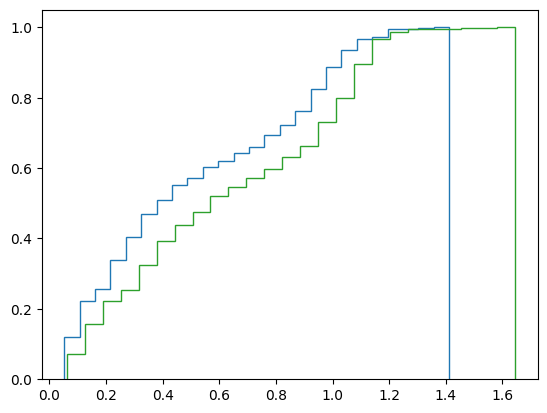

In [94]:
plt.hist(s4l1_li, 25, cumulative=True, histtype="step", color='tab:blue', density=True)
plt.hist(s4l2_li, 25, cumulative=True, histtype="step", color='tab:green', density=True)

(array([0.08333333, 0.25      , 0.41666667, 0.58641975, 0.67592593,
        0.77160494, 0.83950617, 0.88271605, 0.91975309, 0.94444444,
        0.95061728, 0.95987654, 0.96604938, 0.97222222, 0.98148148,
        0.99074074, 0.99074074, 0.99074074, 0.99074074, 0.99382716,
        0.99691358, 0.99691358, 0.99691358, 0.99691358, 1.        ]),
 array([0.01123181, 0.06400592, 0.11678004, 0.16955416, 0.22232828,
        0.2751024 , 0.32787652, 0.38065063, 0.43342475, 0.48619887,
        0.53897299, 0.59174711, 0.64452123, 0.69729534, 0.75006946,
        0.80284358, 0.8556177 , 0.90839182, 0.96116594, 1.01394005,
        1.06671417, 1.11948829, 1.17226241, 1.22503653, 1.27781065,
        1.33058476]),
 [<matplotlib.patches.Polygon at 0x7f6932481f60>])

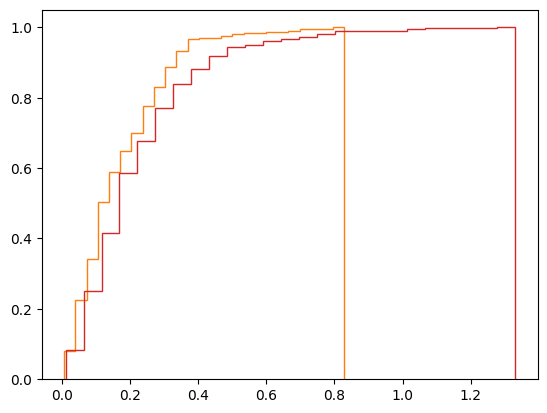

In [95]:
plt.hist(phil1_li, 25, cumulative=True, histtype="step", color='tab:orange', density=True)
plt.hist(phil2_li, 25, cumulative=True, histtype="step", color='tab:red', density=True)

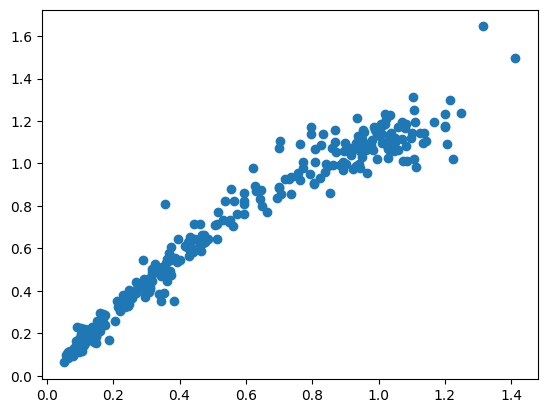

In [96]:
plt.scatter(s4l1_li, s4l2_li)

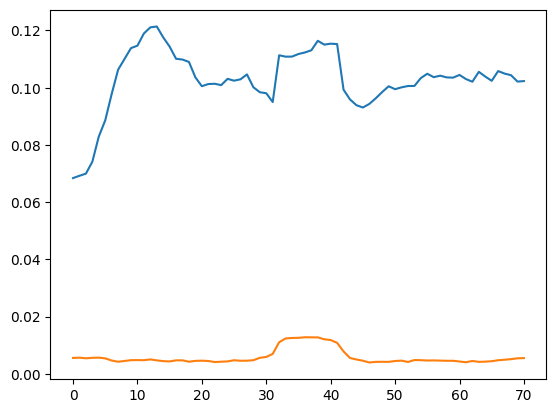

In [97]:
plt.plot(lv2.s4_L1)
plt.plot(lv2.sigma_phi_L1)

In [68]:
lv2.s4_L1.max().values

array(1.0971324)

In [71]:
lv2

<xarray.Dataset>
Dimensions:       (attribute_dimension: 1, time: 160)
Coordinates:
  * time          (time) float64 96.0 97.0 98.0 99.0 ... 252.0 253.0 254.0 255.0
Dimensions without coordinates: attribute_dimension
Data variables: (12/21)
    sigma_phi_L1  (time) float64 dask.array<chunksize=(160,), meta=np.ndarray>
    sigma_phi_L2  (time) float64 dask.array<chunksize=(160,), meta=np.ndarray>
    slip_L1       (time) int8 dask.array<chunksize=(160,), meta=np.ndarray>
    slip_L2       (time) int8 dask.array<chunksize=(160,), meta=np.ndarray>
    s4_L1         (time) float64 dask.array<chunksize=(160,), meta=np.ndarray>
    s4_L2         (time) float64 dask.array<chunksize=(160,), meta=np.ndarray>
    ...            ...
    z_GPS         (time) float64 dask.array<chunksize=(160,), meta=np.ndarray>
    lat           (time) float64 dask.array<chunksize=(160,), meta=np.ndarray>
    lon           (time) float64 dask.array<chunksize=(160,), meta=np.ndarray>
    gast1         (attribute_dimension) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    gast2         (attribute_dimension) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    leapsec       (attribute_dimension) float64 dask.array<chunksize=(1,), meta=np.ndarray>
Attributes: (12/72)
    Conventions:                CF-1.6
    Version:                    $Id$
    alt_s4max_L1:               467.1391479576987
    alt_s4max_L2:               466.960484745543
    alt_sigmaphimax_L1:         466.82490323694947
    alt_sigmaphimax_L2:         466.8438604146231
    ...                         ...
    sigmaphimin_L2:             0.10749554634094238
    startTime:                  1363546585.0
    stopTime:                   1363546840.0
    subver:                     0001.0001
    timeOfProcessing:           2023.272.05.30.06 GPS time
    year:                       2023